In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import matplotlib.ticker as ticker
from highlight_text import fig_text
from PIL import Image
import urllib

In [179]:
from plotly import __version__

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode
cf.go_offline()

In [26]:
sns.set_style('darkgrid')

In [33]:
path = 'C:\\Users\\Gusse\\OneDrive\\Dokumenter\\Python\\Football\\Tutorials\\Sonofacorner_Tutorials\\'

In [34]:
df = pd.read_csv(f'{path}Everton_2223.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          37 non-null     object 
 1   Time          37 non-null     object 
 2   Round         37 non-null     object 
 3   Day           37 non-null     object 
 4   Venue         37 non-null     object 
 5   Result        37 non-null     object 
 6   GF            37 non-null     int64  
 7   GA            37 non-null     int64  
 8   Opponent      37 non-null     object 
 9   xG            37 non-null     float64
 10  xGA           37 non-null     float64
 11  Poss          37 non-null     int64  
 12  Attendance    37 non-null     int64  
 13  Captain       37 non-null     object 
 14  Formation     37 non-null     object 
 15  Referee       37 non-null     object 
 16  Match Report  37 non-null     object 
 17  Notes         0 non-null      float64
dtypes: float64(3), int64(4), object(

In [36]:
df.describe()

,GF,GA,xG,xGA,Poss,Attendance,Notes
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,0.0
mean,0.891892,1.540541,1.197297,1.762162,42.891892,39805.297297,NaN
std,1.021540,1.168917,0.629588,0.762799,9.760418,12178.476038,NaN
min,0.000000,0.000000,0.100000,0.500000,22.000000,10382.000000,NaN
25%,0.000000,1.000000,0.800000,1.000000,38.000000,36338.000000,NaN
50%,1.000000,2.000000,1.200000,1.800000,43.000000,39254.000000,NaN
75%,1.000000,2.000000,1.600000,2.300000,49.000000,39376.000000,NaN
max,5.000000,4.000000,3.100000,3.400000,67.000000,73509.000000,NaN


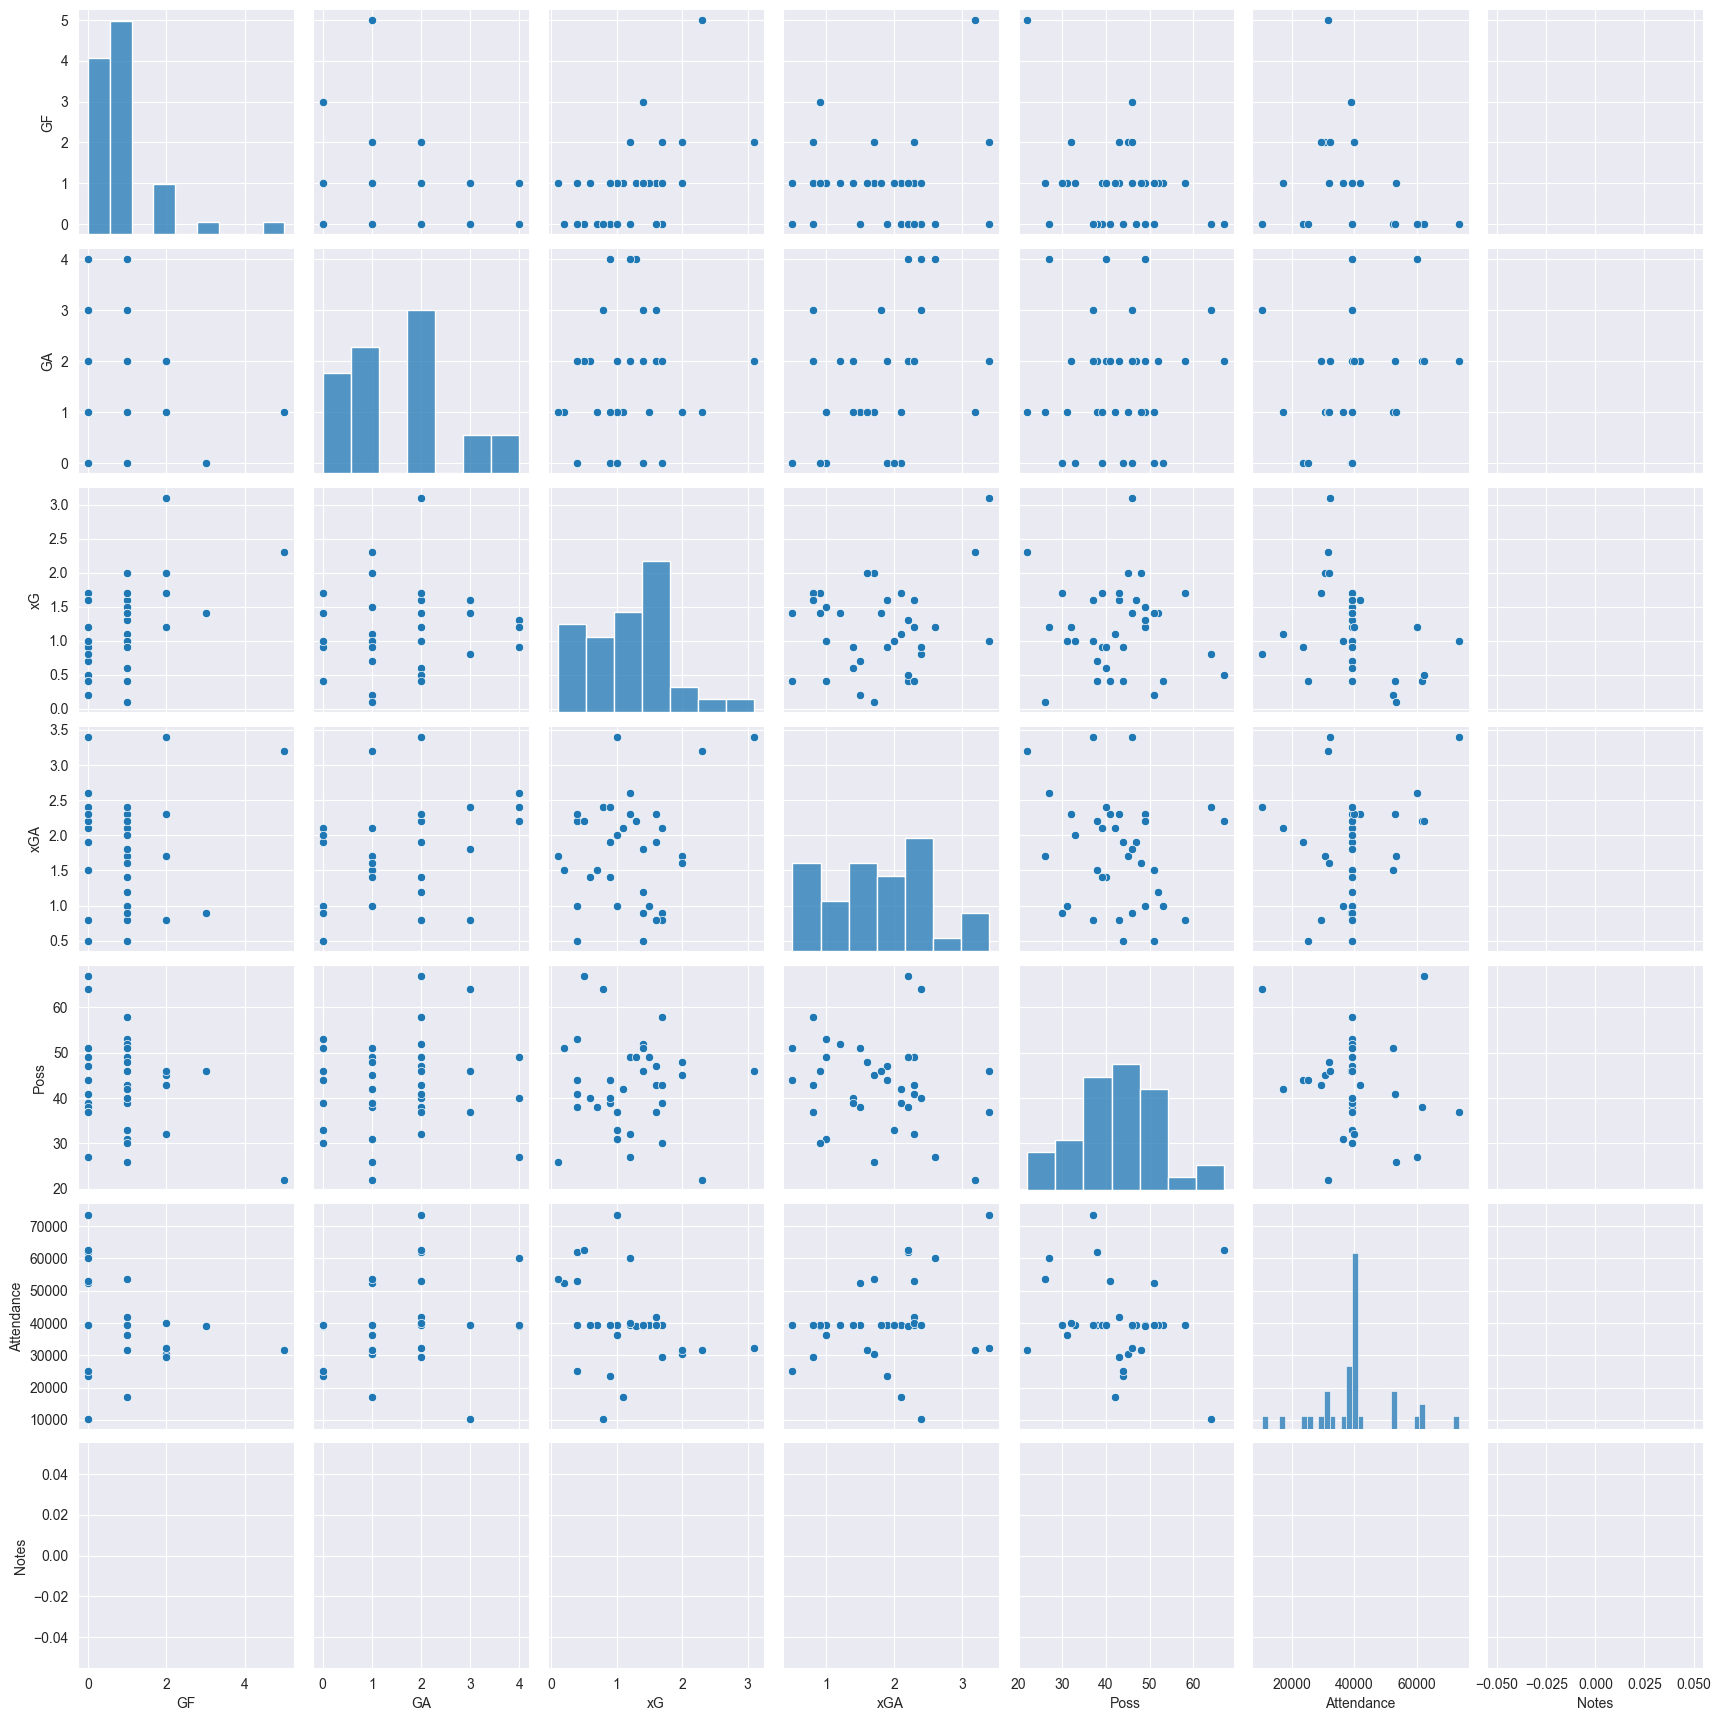

In [58]:
sns.pairplot(df)

In [47]:
Y_for = df["xG"].rolling(window= 3, min_periods = 0).mean()
Y_ag = df["xGA"].rolling(window= 3, min_periods = 0).mean()
X = pd.Series(range(len(Y_for)))

(-0.5, 191.5, 191.5, -0.5)

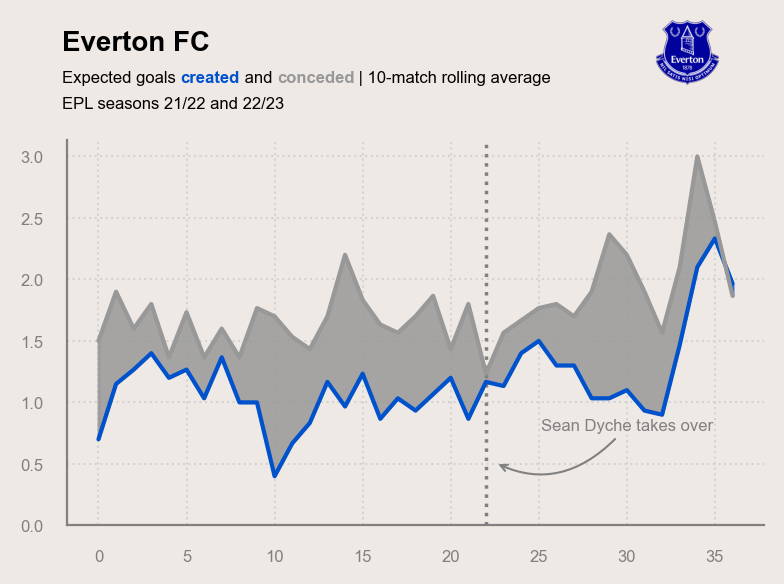

In [48]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# axes
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey",
    zorder = 2
)

# lines
line_1 = ax.plot(X, Y_for, color = "#0052CC", zorder = 4)
line_2 = ax.plot(X, Y_ag, color = "#989898", zorder = 4)

ax.set_ylim(0)

ax.plot(
    [22,22],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# line for manager change
ax.annotate(
    xy = (22, .55),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "Sean Dyche takes over",
    size = 6,
    color = "grey",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    )
)

# fill between lines
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for >= Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag > Y_for, 
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# ticker styling
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)


# Changes to the matplotlib ticker
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))


# Tittle
fig_text(
    x = 0.12, y = 1.1,
    s = "Everton FC",
    color = "black",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 10-match rolling average\nEPL seasons 21/22 and 22/23",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)


# Everton logo
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8668.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

# plt.savefig('viz/Rolling xG Chart for Everton.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Results by Venue')

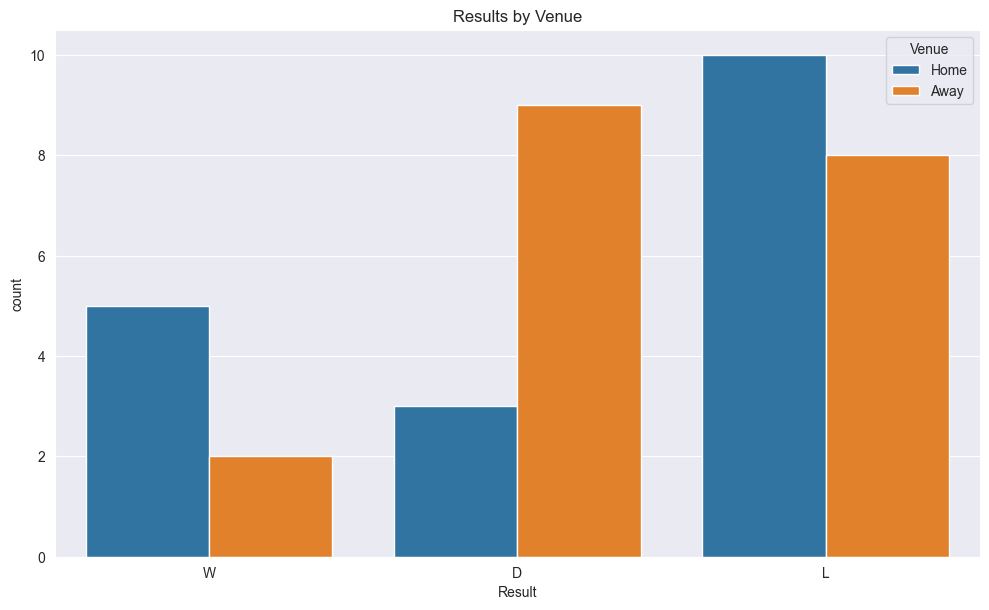

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Result', hue='Venue', order=['W', 'D', 'L'])
plt.tight_layout()
plt.title('Results by Venue')

Text(0.5, 1.0, 'Wins by Formation')

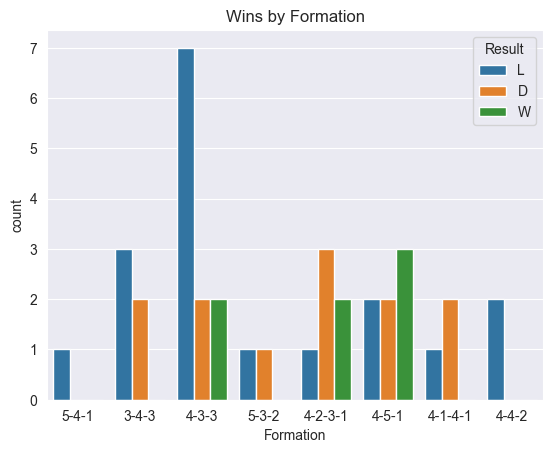

In [62]:
sns.countplot(data=df, x='Formation', hue='Result')
plt.title('Wins by Formation')

Text(0.5, 1.0, 'Games Sorted by Referee')

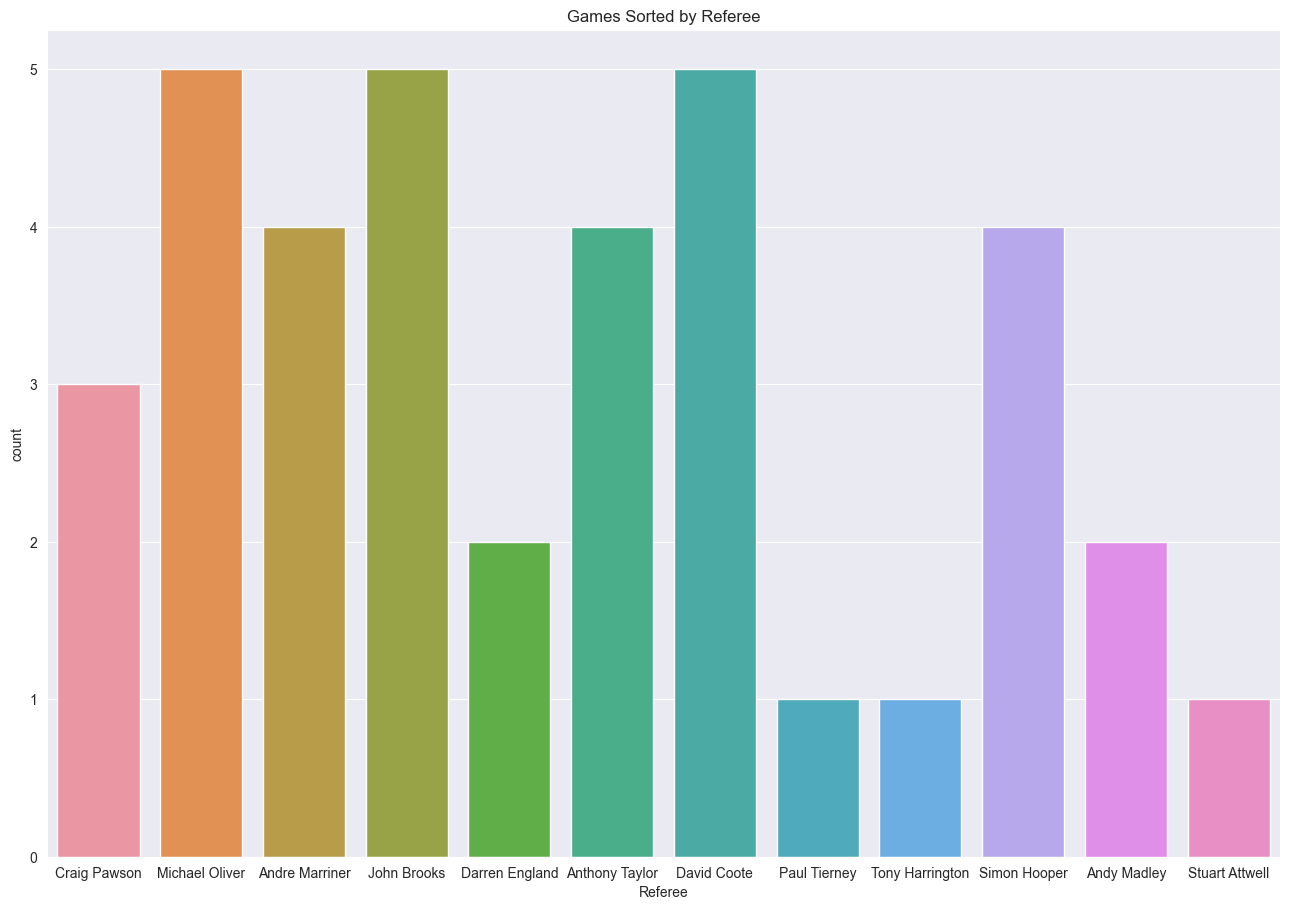

In [68]:
plt.figure(figsize=(13,9))
sns.countplot(data=df, x='Referee')
plt.tight_layout()
plt.title('Games Sorted by Referee')

Text(0.5, 1.0, 'Games Sorted by Referee')

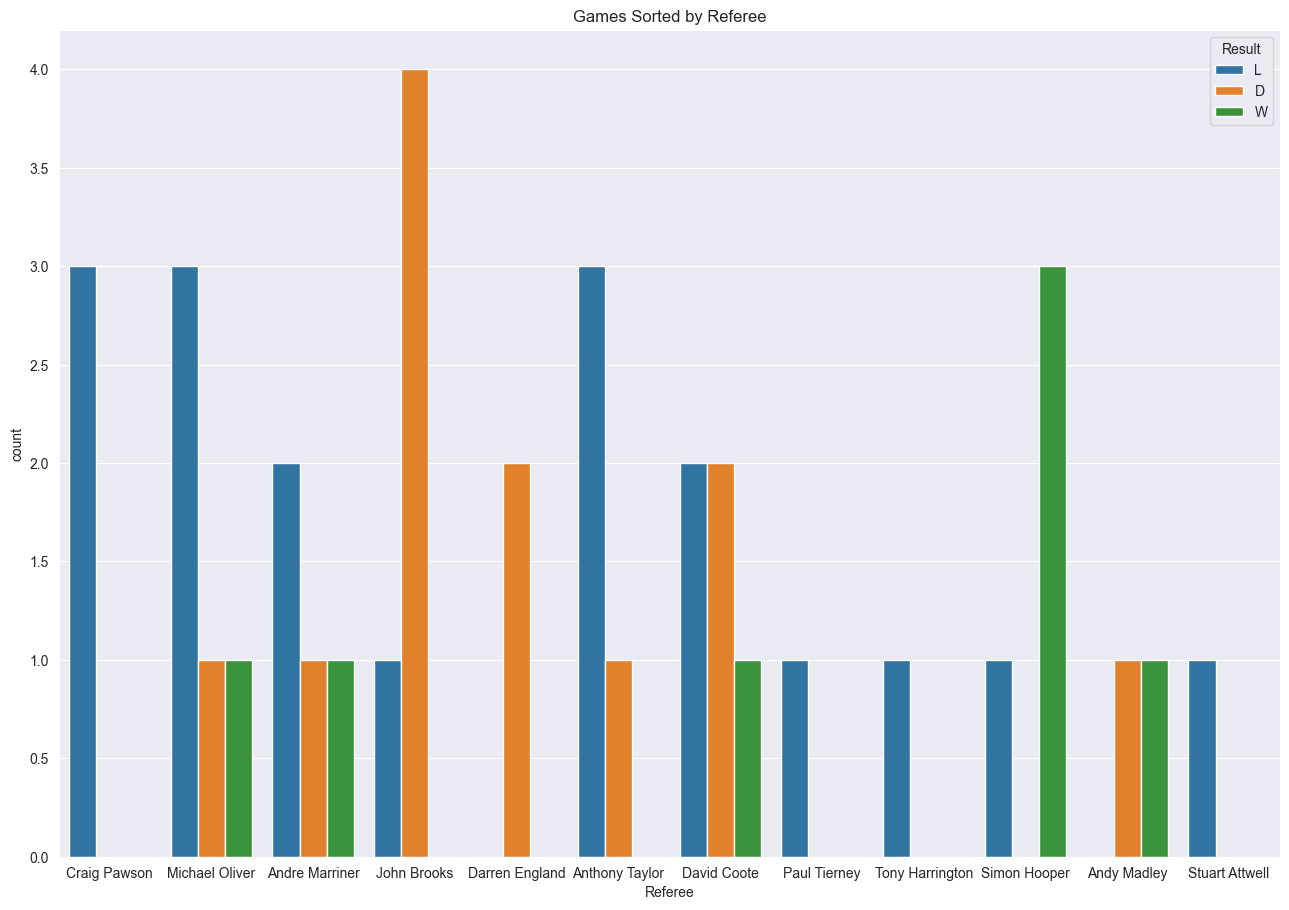

In [69]:
plt.figure(figsize=(13,9))
sns.countplot(data=df, x='Referee', hue='Result')
plt.tight_layout()
plt.title('Games Sorted by Referee')

Text(0.5, 1.0, 'xG')

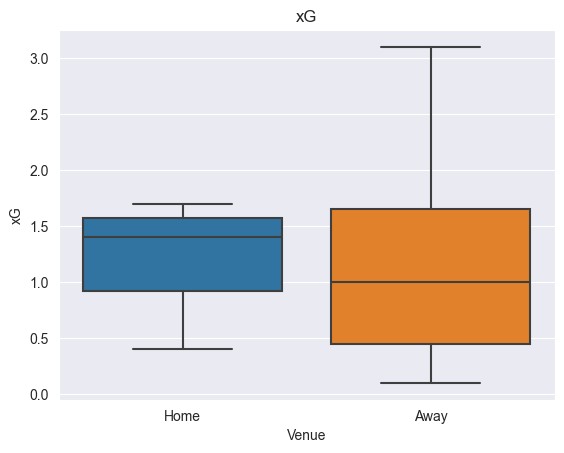

In [125]:
sns.boxplot(data=df, x='Venue', y='xG')
plt.title('xG')

Text(0.5, 1.0, 'xGA')

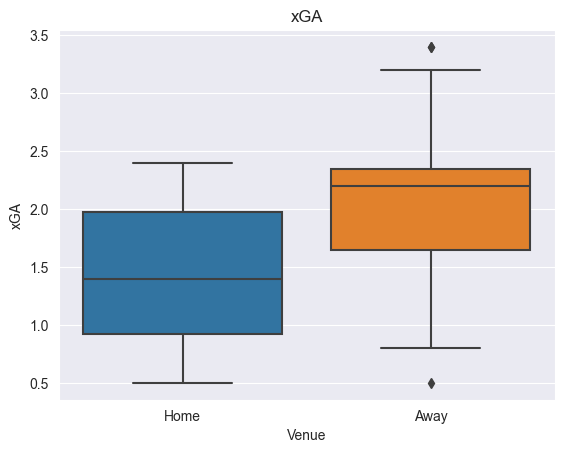

In [126]:
sns.boxplot(data=df, x='Venue', y='xGA')
plt.title('xGA')

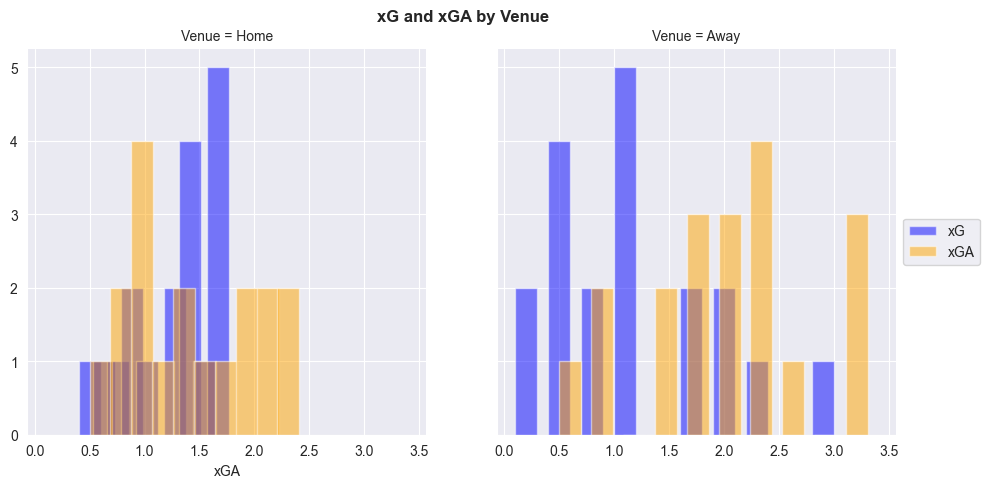

In [153]:
g = sns.FacetGrid(df, col="Venue", height=5)
g = g.map(plt.hist, "xG", color='blue', alpha=0.5, label='xG', width=0.2)
g = g.map(plt.hist, "xGA", color='orange', alpha=0.5, label='xGA', width=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('xG and xGA by Venue', loc='left',x=-0.3, y=1.05, fontweight='bold')
plt.xlabel(' ')
plt.tight_layout()

In [157]:
path2 = 'C:\\Users\\Gusse\\OneDrive\\Dokumenter\\Python\\Football\\'

In [172]:
player_stats = pd.read_csv(f'{path2}Final FBRef 2022-2023.csv')

In [173]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Columns: 279 entries, Player to Main Position
dtypes: float64(267), int64(6), object(6)
memory usage: 6.5+ MB


In [174]:
player_stats.describe()

,Age,Born,MP,Starts,Min,G+A,Glsxx,Goals,Shots,SoT,...,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses
count,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,...,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3033.000000,3033.000000,3012.000000
mean,26.170220,1996.350607,19.546409,14.019351,1258.568383,2.867826,0.115963,1.693014,15.741555,5.243686,...,0.875982,17.973096,17.801590,1.615721,9.368528,2.596573,55.871885,29.410304,1.587570,5.017520
std,4.638177,4.641413,11.750379,11.484468,982.626845,4.449621,0.273379,3.137000,19.514114,7.646555,...,1.816569,22.535763,19.108498,2.083759,4.400041,3.941334,26.555071,6.285962,1.644527,3.674464
min,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1993.000000,9.000000,3.000000,328.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.286329,2.617801,2.830189,0.694643,7.176116,1.134563,42.618146,25.595238,0.352734,3.254214
50%,26.000000,1997.000000,20.000000,12.000000,1123.000000,1.000000,0.000000,0.000000,9.000000,2.000000,...,0.677176,9.493671,12.704174,1.428148,9.290875,2.392503,55.359182,29.289026,1.184346,4.956630
75%,30.000000,2000.000000,30.000000,23.000000,2040.000000,4.000000,0.160000,2.000000,22.000000,7.000000,...,1.126972,25.139665,26.490066,2.136106,10.802244,3.358593,64.610301,32.980600,2.343750,6.580552
max,42.000000,2007.000000,38.000000,38.000000,3420.000000,44.000000,9.000000,36.000000,144.000000,73.000000,...,77.186964,198.515770,168.133803,77.186964,94.055711,96.179986,604.606526,100.000000,25.000000,50.000000


In [176]:
player_stats.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min',
       ...
       'pAdjAerialWinsPer90', 'pAdjAerialLossPer90', 'pAdjDrbPastAttPer90',
       'TouchCentrality', 'Tkl+IntPer600OppTouch', 'pAdjTouchesPer90',
       'CarriesPer50Touches', 'ProgCarriesPer50Touches',
       'ProgPassesPer50CmpPasses', 'Main Position'],
      dtype='object', length=279)

In [175]:
everton_player = player_stats[player_stats['Squad']=='Everton']

In [200]:
everton_player.iplot(kind='scatter', x='SCA', y='GCA', mode='markers', color='blue', title='Creative Actions',
                     xTitle='Shot Creating Actions', yTitle='Goal Creating Actions')

In [223]:
midfielder = everton_player[(everton_player['Main Position'].str.contains('Defensive Midfield')) | 
                (everton_player['Main Position'].str.contains('Attacking Midfield')) |
                (everton_player['Main Position'].str.contains('Central Midfield')) | 
                            (everton_player['Main Position'].str.contains('Right Midfield')) | 
                (everton_player['Main Position'].str.contains('Left Midfield')) |
                (everton_player['Main Position'].str.contains('Left Winger')) |
                (everton_player['Main Position'].str.contains('Right Winger'))]
midfielder = midfielder[midfielder['Min']> 100]

In [224]:
midfielder

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position
15,Abdoulaye Doucouré,ml MLI,MF,Everton,eng Premier League,30,1993,25,17,1533.0,...,11.363636,26.223776,1.898786,7.861641,2.325526,48.900818,26.016830,1.612903,4.418605,Central Midfield
108,Alex Iwobi,ng NGA,"MF,FW",Everton,eng Premier League,27,1996,38,38,3378.0,...,8.741259,24.475524,1.513806,9.567403,2.254649,59.510964,30.570084,2.353556,8.405546,Left Winger
152,Amadou Onana,be BEL,MF,Everton,eng Premier League,21,2001,33,29,2488.0,...,52.447552,48.076923,1.328053,8.899933,3.549661,55.359182,26.106870,1.030534,4.840686,Defensive Midfield
219,Anthony Gordon,eng ENG,FW,Everton,eng Premier League,22,2001,16,12,1095.0,...,7.867133,25.349650,1.652457,7.162583,2.811773,44.552554,27.155172,3.017241,4.922280,Left Winger
642,Demarai Gray,eng ENG,"FW,MF",Everton,eng Premier League,26,1996,33,27,2507.0,...,11.363636,39.335664,0.972801,7.962719,1.486669,49.529542,30.482642,3.979678,3.972366,Left Winger
726,Dwight McNeil,eng ENG,"FW,MF",Everton,eng Premier League,23,1999,36,28,2498.0,...,12.237762,15.734266,1.952611,9.189104,3.081356,57.157876,27.172312,2.798233,5.259146,Left Winger
1131,Idrissa Gana Gueye,sn SEN,MF,Everton,eng Premier League,33,1989,33,32,2577.0,...,23.601399,19.230769,1.831696,10.252042,4.810473,63.769543,26.263596,0.863724,4.780488,Central Midfield
1232,James Garner,eng ENG,"MF,DF",Everton,eng Premier League,22,2001,16,7,804.0,...,10.489510,8.741259,1.859148,9.271465,2.821712,57.670177,24.489796,0.907029,6.445312,Defensive Midfield
2813,Tom Davies,eng ENG,MF,Everton,eng Premier League,24,1998,19,4,538.0,...,6.118881,11.363636,2.047209,9.708274,2.861423,60.387208,24.271845,0.323625,8.670520,Central Midfield


Text(0.5, 1.0, 'Progressive Actions by Everton Midfielders')

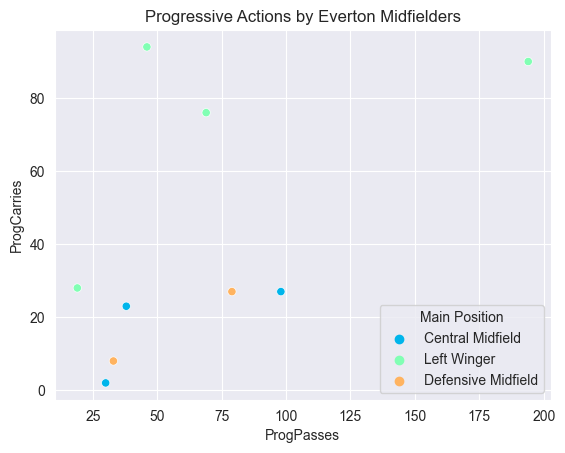

In [230]:
sns.scatterplot(data=midfielder, x='ProgPasses', y='ProgCarries', hue='Main Position', palette='rainbow')
plt.title('Progressive Actions by Everton Midfielders')

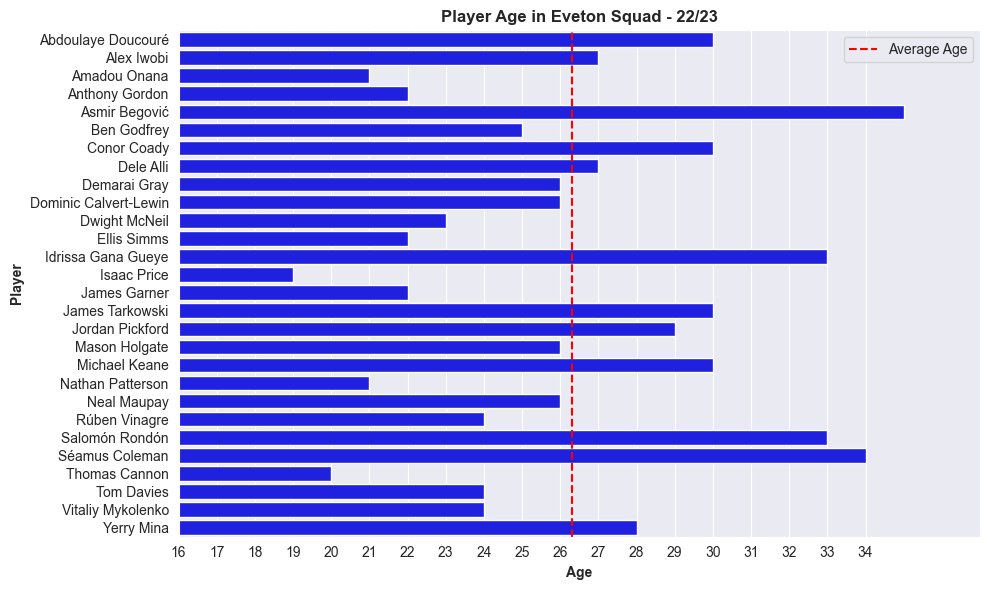

In [316]:
plt.figure(figsize=(10,6))
sns.barplot(data=everton_player, x='Age', y='Player', color='blue')

plt.xlim(16,37)

plt.xlabel('Age', fontweight='bold')

plt.ylabel('Player', fontweight='bold')

plt.title('Player Age in Eveton Squad - 22/23', fontweight='bold')

plt.axvline(x=np.nanmean(everton_player.Age), color='red', ls='--', label='Average Age')

plt.xticks(np.arange(16, 35, 1))

plt.tight_layout()

plt.legend()